# SK5009 Kecerdasan Buatan Lanjut
## Tugas Kelompok 1: SVM

##  Preparation

### Library Preparation

In [196]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, make_scorer

import warnings
warnings.filterwarnings('ignore')
random_seed = 209

### Data Preparation

In [197]:
df = pd.read_csv('penguins_clean.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              325 non-null    object 
 1   Island               325 non-null    object 
 2   Clutch Completion    325 non-null    object 
 3   Date Egg             325 non-null    object 
 4   Culmen Length (mm)   325 non-null    float64
 5   Culmen Depth (mm)    325 non-null    float64
 6   Flipper Length (mm)  325 non-null    float64
 7   Body Mass (g)        325 non-null    float64
 8   Sex                  325 non-null    object 
 9   Delta 15 N (o/oo)    325 non-null    float64
 10  Delta 13 C (o/oo)    325 non-null    float64
dtypes: float64(6), object(5)
memory usage: 28.1+ KB


In [198]:
df.head(3)

,Species,Island,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454
1,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302
2,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426


## Data Preprocessing

### Descriptive Statistics

In [199]:
df.describe()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
mean,44.054769,17.123077,201.264615,4216.000000,8.737794,-25.690217
std,5.472226,1.965942,13.964598,808.859222,0.552581,0.790098
min,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540
25%,39.500000,15.600000,190.000000,3550.000000,8.302310,-26.326010
50%,44.900000,17.300000,197.000000,4050.000000,8.658030,-25.852030
75%,48.700000,18.600000,213.000000,4800.000000,9.180210,-25.060200
max,59.600000,21.500000,231.000000,6300.000000,10.025440,-23.890170


In [200]:
df.describe(include='object')

,Species,Island,Clutch Completion,Date Egg,Sex
count,325,325,325,325,325
unique,3,3,2,50,3
top,Adelie Penguin (Pygoscelis adeliae),Biscoe,Yes,11/27/07,FEMALE
freq,139,163,291,18,163


In [201]:
species_dict = {'Adelie Penguin (Pygoscelis adeliae)': 'Adelie', 
                'Chinstrap penguin (Pygoscelis antarctica)': 'Chinstrap', 
                'Gentoo penguin (Pygoscelis papua)': 'Gentoo'}

df['Species'] = df['Species'].replace(species_dict)
df['Species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

### Categorical Feature Encoding

In [ ]:
categorical_cols = [col for col in df.columns if df[col].dtype == 'object' and col != 'Species']
ordinal_encoder = OrdinalEncoder()
df[categorical_cols] = ordinal_encoder.fit_transform(df[categorical_cols])

In [203]:
df['Species'].value_counts()

Species
Adelie       139
Gentoo       119
Chinstrap     67
Name: count, dtype: int64

In [ ]:
species = ['Adelie', 'Chinstrap', 'Gentoo']

def encode_category(x, order):
    return order.index(x)

# df['Species'] = df['Species'].apply(lambda x: encode_category(x, species))

### Feature Selection

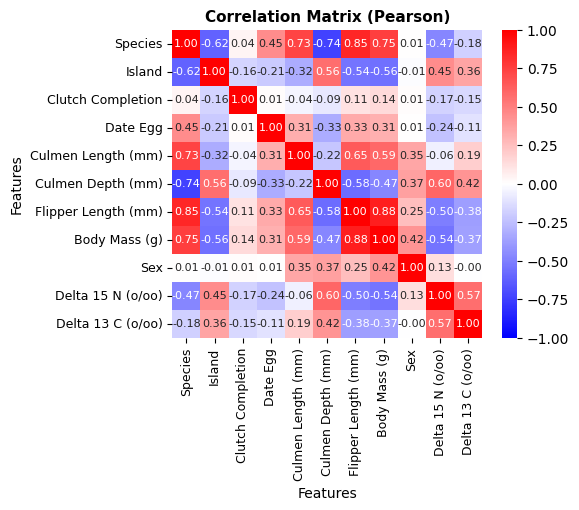

In [206]:
df_encoded = df.copy()
df_encoded['Species'] = df['Species'].apply(lambda x: encode_category(x, species))

plt.figure(figsize=(5, 4))
ax = sns.heatmap(df_encoded.corr(method='pearson'), vmin=-1, vmax=1, cmap='bwr', annot=True, fmt='.2f', annot_kws={'fontsize': 8})
ax.set_xticklabels(ax.get_xticklabels(), fontdict={'fontsize': 9})
ax.set_yticklabels(ax.get_yticklabels(), fontdict={'fontsize': 9})
plt.title('Correlation Matrix (Pearson)', fontweight='bold', fontsize='11')
plt.xlabel('Features', fontsize=10)
plt.ylabel('Features', fontsize=10)
plt.show()

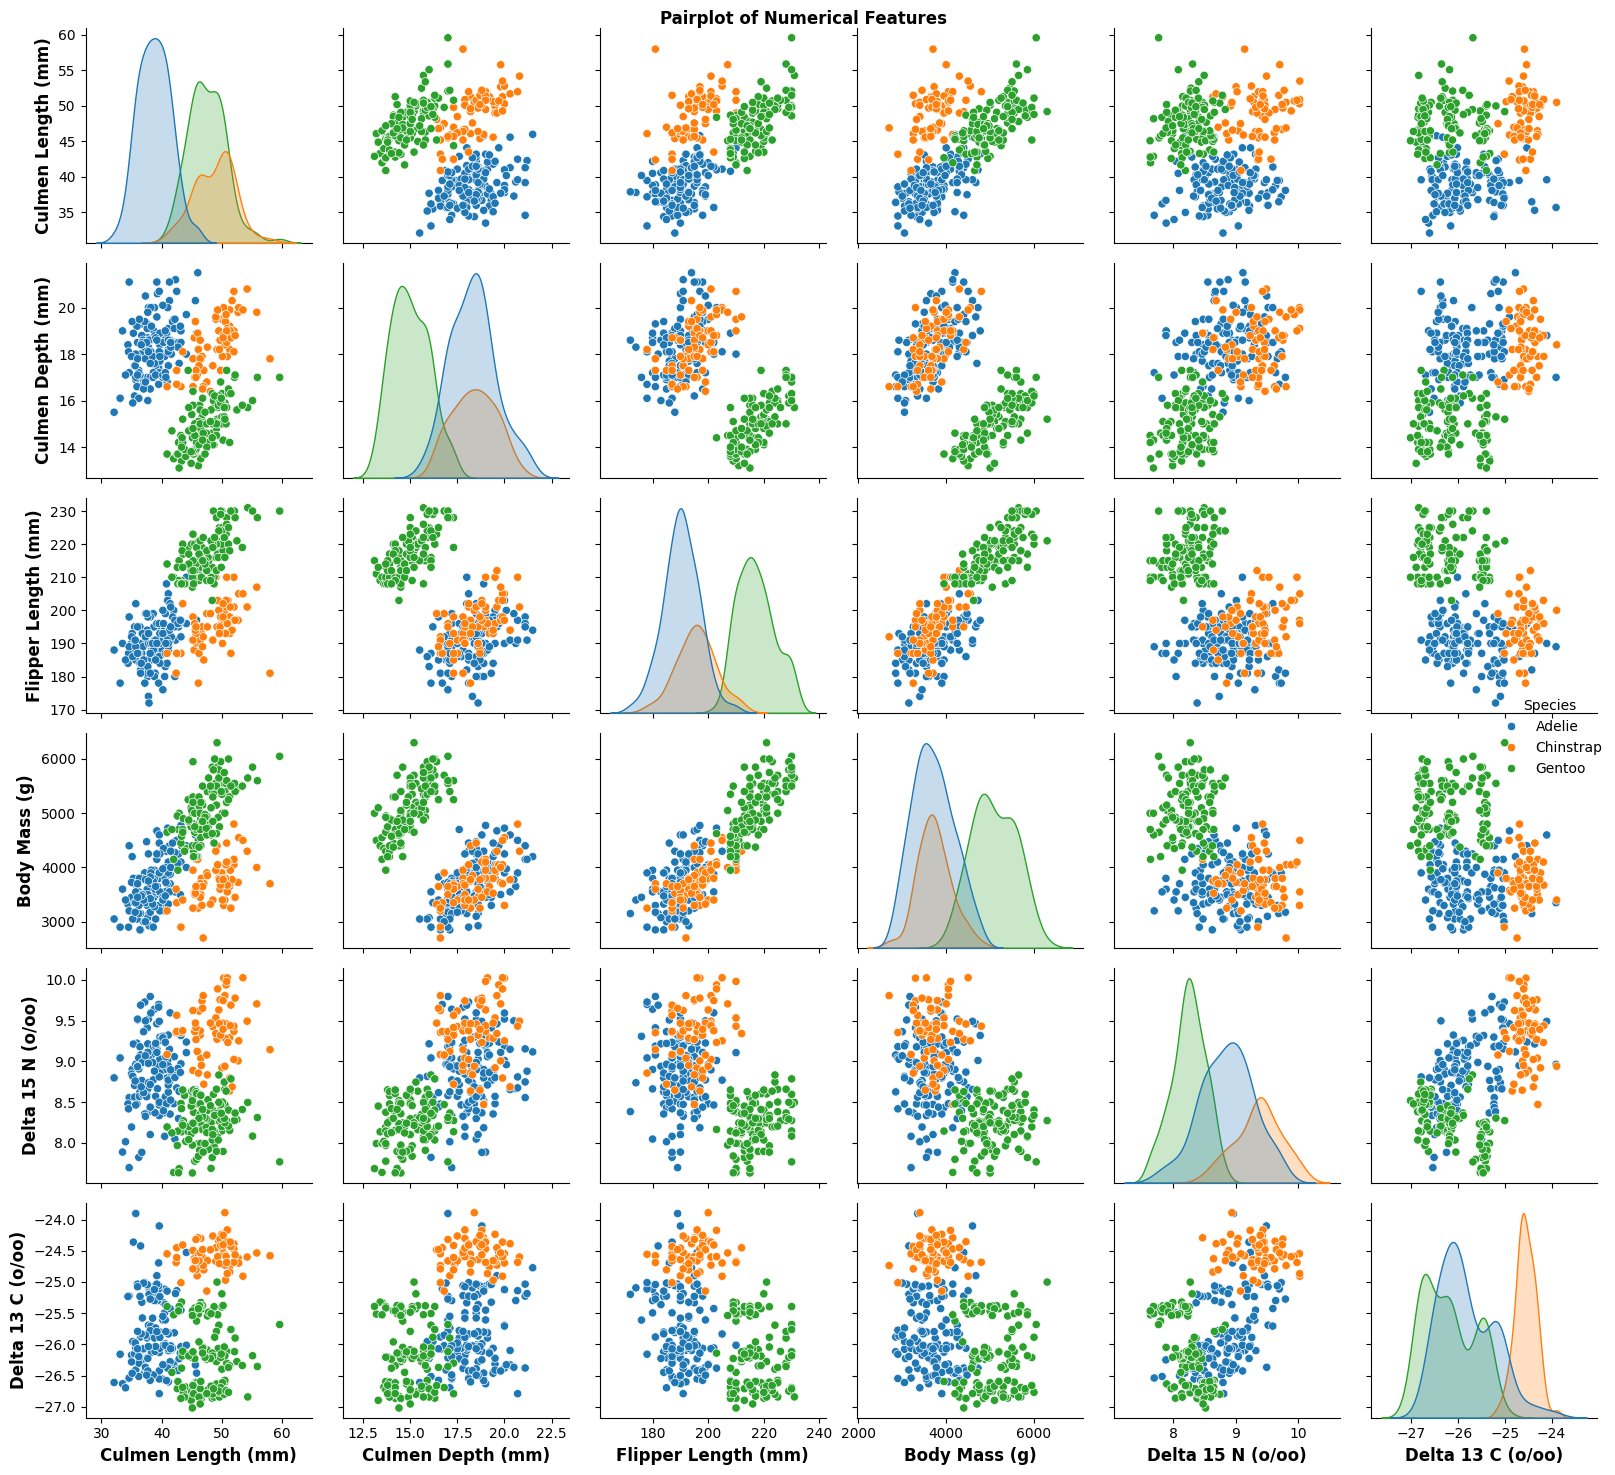

In [ ]:
cols = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 
        'Body Mass (g)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Species']
p = sns.pairplot(df[cols], kind='scatter', diag_kind='kde', corner=False, hue='Species',  
             plot_kws={}, 
             diag_kws={'color': 'blue'})

p.fig.suptitle('Pairplot of Numerical Features', fontsize=12, fontweight='bold')
for ax in p.axes.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize=12, fontweight='bold')
    ax.set_ylabel(ax.get_ylabel(), fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

## SVM Model

### 2D SVM

In [208]:
# cols = ['Flipper Length (mm)', 'Culmen Length (mm)']
cols = ['Culmen Length (mm)', 'Culmen Depth (mm)']
X = df[cols].to_numpy()
y = df['Species']
y_encoded = y.apply(lambda x: encode_category(x, species))

X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, train_size=0.7, stratify=y, random_state=89)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.33, stratify=y_val, random_state=89)

standard_scaler = StandardScaler()
X_train_scaled = standard_scaler.fit_transform(X_train)
X_val_scaled = standard_scaler.transform(X_val)
X_test_scaled = standard_scaler.transform(X_test)

cs = [0.01, 0.1, 1, 10, 100]
models = {}
for c in cs:
    model = SVC(kernel='linear', C=c, random_state=random_seed)
    models[f'SVM (C={c})'] = model

def evaluate_model(models, X_train, y_train, X_val, y_val, X_test, y_test, labels):

    df = pd.DataFrame()
    for (key, model) in models.items():
        model.fit(X_train, y_train)
        y_val_pred = model.predict(X_val)
        y_test_pred = model.predict(X_test)
        
        val_accuracy = accuracy_score(y_val, y_val_pred)
        val_precision = precision_score(y_val, y_val_pred, average='macro', zero_division=0)
        val_recall = recall_score(y_val, y_val_pred, average='macro', zero_division=0)
        val_f1 = f1_score(y_val, y_val_pred, average='macro', zero_division=0)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_precision = precision_score(y_test, y_test_pred, average='macro', zero_division=0)
        test_recall = recall_score(y_test, y_test_pred, average='macro', zero_division=0)
        test_f1 = f1_score(y_test, y_test_pred, average='macro', zero_division=0)

        metrics = {
            'val_accuracy': val_accuracy,
            'val_precision': val_precision,
            'val_recall': val_recall,
            'val_f1': val_f1,
            'test_accuracy': test_accuracy,
            'test_precision': test_precision,
            'Test_recall': test_recall,
            'Test_f1': test_f1
        }
        model_df = pd.DataFrame(metrics, index=[key])
        df = pd.concat([df, model_df])
    
    df = df.round(3)
    return df

df_metrics = evaluate_model(models, X_train_scaled, y_train, X_val_scaled, y_val, X_test_scaled, y_test, species)
df_metrics

,val_accuracy,val_precision,val_recall,val_f1,test_accuracy,test_precision,Test_recall,Test_f1
SVM (C=0.01),0.908,0.930,0.846,0.863,0.848,0.894,0.762,0.757
SVM (C=0.1),0.985,0.989,0.974,0.981,0.909,0.933,0.857,0.874
SVM (C=1),0.969,0.963,0.960,0.961,0.939,0.958,0.905,0.922
SVM (C=10),0.985,0.976,0.986,0.981,0.970,0.978,0.952,0.963
SVM (C=100),0.969,0.956,0.974,0.963,0.939,0.958,0.905,0.922


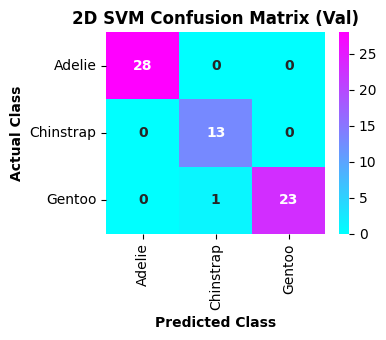

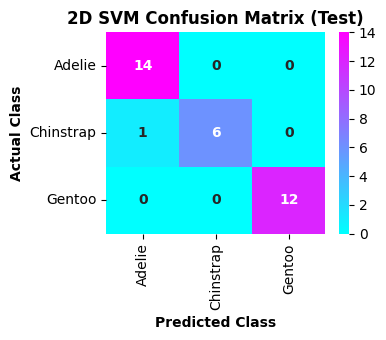

In [209]:
def plot_confusion_matrix(cm, class_names, figsize, title, cmap, filename='cm'):
    plt.figure(figsize=figsize)
    p = sns.heatmap(cm, annot=True, fmt='d', annot_kws={'fontweight':'bold'}, cmap=cmap, 
                    xticklabels=class_names, yticklabels=class_names)
    p.set_xticklabels(p.get_xticklabels(), rotation=90, fontsize = 10)
    p.set_yticklabels(p.get_yticklabels(), rotation=0, fontsize = 10)
    plt.xlabel('Predicted Class', fontweight='bold')
    plt.ylabel('Actual Class', fontweight='bold')
    plt.title(title, fontweight='bold')
    plt.tight_layout()
    # plt.savefig(os.path.join(OUTPUT_DIR, f'{filename}.png'))
    plt.show()

model = models['SVM (C=10)']
model.fit(X_train_scaled, y_train)
y_val_pred = model.predict(X_val_scaled)
y_test_pred = model.predict(X_test_scaled)
cm_val = confusion_matrix(y_val, y_val_pred)
cm_test = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm_val, species, (4, 3.5), '2D SVM Confusion Matrix (Val)', 'cool')
plot_confusion_matrix(cm_test, species, (4, 3.5), '2D SVM Confusion Matrix (Test)', 'cool')

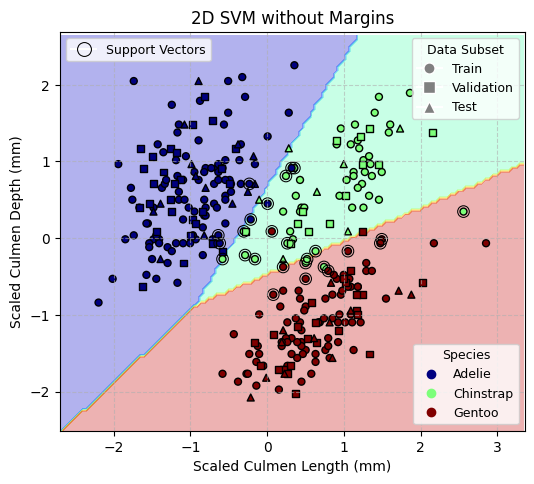

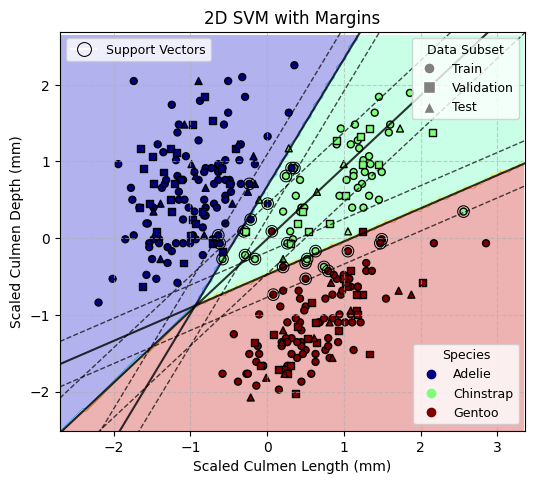

In [210]:
def visualize_2d_svm_with_splits(X_train, y_train, X_val, y_val, X_test, y_test, model, cols, target_names, title, cmap, add_margin):
    # Combine all data for consistent plot limits
    X_all = np.vstack((X_train, X_val, X_test))
    x_range = X_all[:, 0].max() - X_all[:, 0].min()
    y_range = X_all[:, 1].max() - X_all[:, 1].min()
    x_min, x_max = X_all[:, 0].min() - 0.1*x_range, X_all[:, 0].max() + 0.1*x_range
    y_min, y_max = X_all[:, 1].min() - 0.1*y_range, X_all[:, 1].max() + 0.1*y_range

    # Create the meshgrid for the decision surface
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                       np.arange(y_min, y_max, 0.05))

    # Predict on the meshgrid to get decision regions
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 6))
    plt.gca().set_aspect('equal')

    # Plot the decision surface
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)

    marker_size = 25
    edge_color = 'k'
    line_width = 1
    # Training data: circles
    scatter_train = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap, linewidths=line_width,
                                s=marker_size, edgecolors=edge_color, marker='o')
    # Validation data: squares
    plt.scatter(X_val[:, 0], X_val[:, 1], c=y_val, cmap=cmap, linewidths=line_width, 
                s=marker_size, edgecolors=edge_color, marker='s')
    
    # Test data: triangles
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap, linewidths=line_width, 
                s=marker_size, edgecolors=edge_color, marker='^')
    
    # Plot Support Vectors (from the training set)
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                s=70, facecolors='none', edgecolors='k', linewidth=0.75, 
                label='Support Vectors')

    if add_margin:
        # Margins
        W = model.coef_
        B = model.intercept_
        x0_range = np.linspace(x_min, x_max, 200)
        for i in range(W.shape[0]):
            w = W[i]
            b = B[i]
            
            # Check if w[1] is near zero to prevent division by zero
            if np.abs(w[1]) < 1e-10:
                continue 
            
            # Hyperplane: x1 = -w0/w1 * x0 - b/w1 (where w.x + b = 0)
            decision_boundary = -w[0] / w[1] * x0_range - b / w[1]
            
            # Margin Lines: w.x + b = 1 and w.x + b = -1
            margin = 1 / w[1]
            gutter_up = decision_boundary + margin
            gutter_down = decision_boundary - margin
        
            plt.plot(x0_range, gutter_up, 'k--', linewidth=1.0, alpha=0.7)
            plt.plot(x0_range, gutter_down, 'k--', linewidth=1.0, alpha=0.7)
            plt.plot(x0_range, decision_boundary, 'k-', linewidth=1.5, alpha=0.8, zorder=5)

    plt.xlabel(f'Scaled {cols[0]}')
    plt.ylabel(f'Scaled {cols[1]}')
    plt.title(title)
    plt.grid(True, linestyle='--', alpha=0.6)

    legend_fontsize = 9
    # 1. Legend for Species (colors)
    color_handles, _ = scatter_train.legend_elements()
    color_legend = plt.legend(color_handles, target_names,
                              title='Species',
                              loc='lower right', 
                              title_fontsize=legend_fontsize, fontsize=legend_fontsize)
    plt.gca().add_artist(color_legend)

    # 2. Legend for Data Subsets (shapes)
    shape_handles = [
        Line2D([0], [0], marker='o', color='w', label='Train', markersize=8, markerfacecolor='gray'),
        Line2D([0], [0], marker='s', color='w', label='Validation', markersize=8, markerfacecolor='gray'),
        Line2D([0], [0], marker='^', color='w', label='Test', markersize=8, markerfacecolor='gray')
    ]
    shape_legend = plt.legend(handles=shape_handles, title='Data Subset', loc='upper right', 
                              title_fontsize=legend_fontsize, fontsize=legend_fontsize)
    plt.gca().add_artist(shape_legend)
    
    # 3. Legend for Support Vectors
    sv_handle = [Line2D([0], [0], marker='o', color='w', label='Support Vectors', 
                markersize=10, markerfacecolor='none', markeredgecolor='k', markeredgewidth=0.75)]
    plt.legend(handles=sv_handle, loc='upper left', fontsize=legend_fontsize)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.show()

visualize_2d_svm_with_splits(
    X_train_scaled, y_train,
    X_val_scaled, y_val,
    X_test_scaled, y_test,
    model, cols, species, 
    title='2D SVM without Margins', cmap='jet',
    add_margin=False
)

visualize_2d_svm_with_splits(
    X_train_scaled, y_train,
    X_val_scaled, y_val,
    X_test_scaled, y_test,
    model, cols, species, 
    title='2D SVM with Margins',
    cmap='jet', 
    add_margin=True
)

### 3D SVM

In [211]:
# cols = ['Flipper Length (mm)', 'Culmen Length (mm)']
cols = ['Culmen Length (mm)', 'Culmen Depth (mm)','Delta 13 C (o/oo)']
X = df[cols].to_numpy()
y = df['Species']
y_encoded = y.apply(lambda x: encode_category(x, species))

X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, train_size=0.7, stratify=y, random_state=89)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.33, stratify=y_val, random_state=89)

standard_scaler = StandardScaler()
X_train_scaled = standard_scaler.fit_transform(X_train)
X_val_scaled = standard_scaler.transform(X_val)
X_test_scaled = standard_scaler.transform(X_test)

cs = [0.1, 1, 10]
models = {}
for c in cs:
    model = SVC(kernel='linear', C=c, random_state=random_seed)
    models[f'SVM (C={c})'] = model

def evaluate_model(models, X_train, y_train, X_val, y_val, X_test, y_test, labels):

    df = pd.DataFrame()
    for (key, model) in models.items():
        model.fit(X_train, y_train)
        y_val_pred = model.predict(X_val)
        y_test_pred = model.predict(X_test)
        
        val_accuracy = accuracy_score(y_val, y_val_pred)
        val_precision = precision_score(y_val, y_val_pred, average='macro', zero_division=0)
        val_recall = recall_score(y_val, y_val_pred, average='macro', zero_division=0)
        val_f1 = f1_score(y_val, y_val_pred, average='macro', zero_division=0)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_precision = precision_score(y_test, y_test_pred, average='macro', zero_division=0)
        test_recall = recall_score(y_test, y_test_pred, average='macro', zero_division=0)
        test_f1 = f1_score(y_test, y_test_pred, average='macro', zero_division=0)

        metrics = {
            'val_accuracy': val_accuracy,
            'val_precision': val_precision,
            'val_recall': val_recall,
            'val_f1': val_f1,
            'test_accuracy': test_accuracy,
            'test_precision': test_precision,
            'Test_recall': test_recall,
            'Test_f1': test_f1
        }
        model_df = pd.DataFrame(metrics, index=[key])
        df = pd.concat([df, model_df])
    
    df = df.round(3)
    return df

df_metrics = evaluate_model(models, X_train_scaled, y_train, X_val_scaled, y_val, X_test_scaled, y_test, species)
df_metrics

,val_accuracy,val_precision,val_recall,val_f1,test_accuracy,test_precision,Test_recall,Test_f1
SVM (C=0.1),1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
SVM (C=1),1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
SVM (C=10),1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


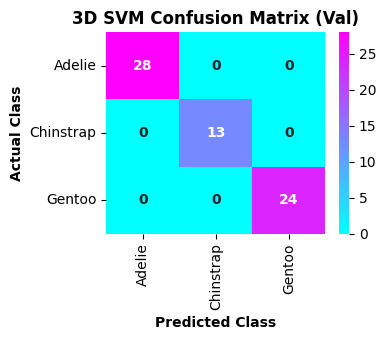

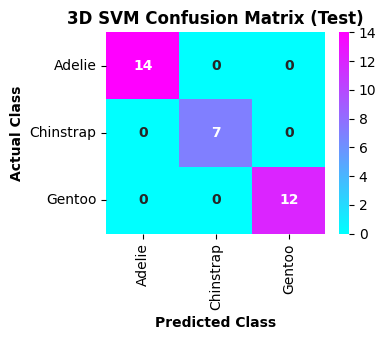

In [212]:
def plot_confusion_matrix(cm, class_names, figsize, title, cmap, filename='cm'):
    plt.figure(figsize=figsize)
    p = sns.heatmap(cm, annot=True, fmt='d', annot_kws={'fontweight':'bold'}, cmap=cmap, 
                    xticklabels=class_names, yticklabels=class_names)
    p.set_xticklabels(p.get_xticklabels(), rotation=90, fontsize = 10)
    p.set_yticklabels(p.get_yticklabels(), rotation=0, fontsize = 10)
    plt.xlabel('Predicted Class', fontweight='bold')
    plt.ylabel('Actual Class', fontweight='bold')
    plt.title(title, fontweight='bold')
    plt.tight_layout()
    # plt.savefig(os.path.join(OUTPUT_DIR, f'{filename}.png'))
    plt.show()

model = models['SVM (C=10)']
model.fit(X_train_scaled, y_train)
y_val_pred = model.predict(X_val_scaled)
y_test_pred = model.predict(X_test_scaled)
cm_val = confusion_matrix(y_val, y_val_pred)
cm_test = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm_val, species, (4, 3.5), '3D SVM Confusion Matrix (Val)', 'cool')
plot_confusion_matrix(cm_test, species, (4, 3.5), '3D SVM Confusion Matrix (Test)', 'cool')

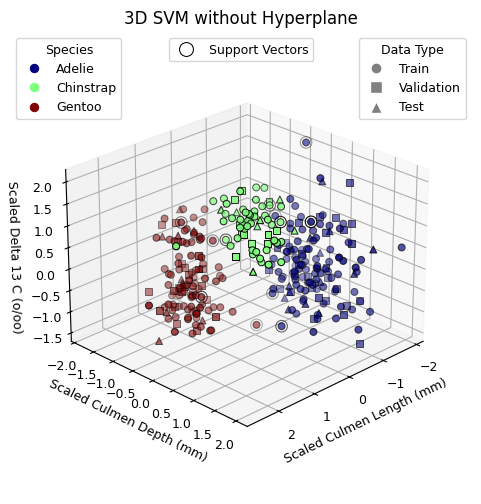

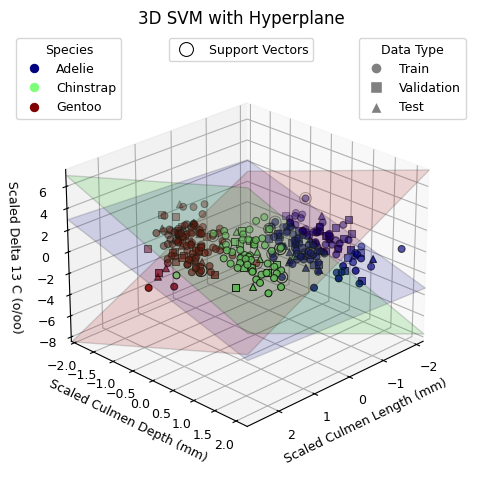

In [ ]:
def visualize_3d_svm_with_splits(X_train, y_train, X_val, y_val, X_test, y_test, model, cols, target_names, title, cmap, add_plane):
    # Combine all data for consistent plot limits
    X_all = np.vstack((X_train, X_val, X_test))
    x_range = X_all[:, 0].max() - X_all[:, 0].min()
    y_range = X_all[:, 1].max() - X_all[:, 1].min()
    z_range = X_all[:, 2].max() - X_all[:, 2].min()
    x_min, x_max = X_all[:, 0].min() - 0.001*x_range, X_all[:, 0].max() + 0.001*x_range
    y_min, y_max = X_all[:, 1].min() - 0.001*y_range, X_all[:, 1].max() + 0.001*y_range
    z_min, z_max = X_all[:, 2].min() - 0.001*z_range, X_all[:, 2].max() + 0.001*z_range

    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(elev=25, azim=45, roll=0)

    marker_size = 25
    edge_color = 'k'
    line_width = 0.75

    # Training data: circles
    scatter_train = ax.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], linewidths=line_width,
                               c=y_train, cmap='jet', s=marker_size, edgecolors=edge_color, marker='o')
    # Validation data: squares
    ax.scatter(X_val[:, 0], X_val[:, 1], X_val[:, 2], linewidths=line_width,
               c=y_val, cmap='jet', s=marker_size, edgecolors=edge_color, marker='s')
    # Test data: triangles
    ax.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], linewidths=line_width,
               c=y_test, cmap='jet', s=marker_size, edgecolors=edge_color, marker='^')

    # Support Vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], model.support_vectors_[:, 2],
               s=70, facecolors='none', edgecolors='k', linewidth=0.75, label='Support Vectors')

    all_zz = []
    if add_plane:
        # Hyperplanes
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

        W = model.coef_
        B = model.intercept_
        plane_colors = ['#FF0000', '#00FF00', '#0000FF']
        for i in range(W.shape[0]):
            w = W[i]
            b = B[i]
            if np.abs(w[2]) > 1e-6: # Avoid division by zero
                zz = (-w[0] * xx - w[1] * yy - b) / w[2]
                all_zz.append(zz)
                # zz[zz < 1.1*z_min] = np.nan
                # zz[zz > 1.1*z_max] = np.nan
                # ax.plot_surface(xx, yy, zz, alpha=0.2, cmap='Blues', rstride=len(xx)-1, cstride=len(yy[0])-1, 
                #                 edgecolor='k')                               
                ax.plot_surface(xx, yy, zz, alpha=0.15, color=plane_colors[i], rstride=len(xx)-1, cstride=len(yy[0])-1, 
                                facecolors=None, edgecolor='k', linewidth=1, zorder=0)   

    # Find the z-range of the planes
    plane_z_min = np.min(all_zz) if all_zz else z_min
    plane_z_max = np.max(all_zz) if all_zz else z_max
        
    # Use the combined range of the data AND the planes
    final_z_min = min(z_min, plane_z_min)
    final_z_max = max(z_max, plane_z_max)

    legend_fontsize = 9
    # --- 4. Configure Axes and Titles ---
    ax.set_xlabel(f'Scaled {cols[0]}', labelpad=5, fontsize=legend_fontsize)
    ax.set_ylabel(f'Scaled {cols[1]}', labelpad=5, fontsize=legend_fontsize)
    ax.set_zlabel(f'Scaled {cols[2]}', labelpad=5, fontsize=legend_fontsize)
    ax.set_title(title)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    # ax.set_zlim(z_min, z_max)
    ax.set_zlim(final_z_min, final_z_max)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=legend_fontsize)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=legend_fontsize)
    ax.set_zticklabels(ax.get_zticklabels(), fontsize=legend_fontsize)
    
    # Legend for Species (colors)
    color_handles, _ = scatter_train.legend_elements()
    color_legend = plt.legend(color_handles, target_names,
                              title='Species',
                              loc='upper left', 
                              title_fontsize=legend_fontsize, fontsize=legend_fontsize)
    plt.gca().add_artist(color_legend)

    # Legend for Data Subsets (shapes) and Support Vectors
    shape_handles = [
        Line2D([0], [0], marker='o', color='w', label='Train', markersize=8, markerfacecolor='gray'),
        Line2D([0], [0], marker='s', color='w', label='Validation', markersize=8, markerfacecolor='gray'),
        Line2D([0], [0], marker='^', color='w', label='Test', markersize=8, markerfacecolor='gray'),
    ]
    shape_legend = ax.legend(handles=shape_handles, title='Data Type', loc='upper right', 
                              title_fontsize=legend_fontsize, fontsize=legend_fontsize)
    ax.add_artist(shape_legend)

    sv_handles = [Line2D([0], [0], marker='o', color='w', label='Support Vectors', 
                         markersize=10, markerfacecolor='none', markeredgecolor='k', markeredgewidth=0.75)]
    plt.legend(handles=sv_handles, loc='upper center', fontsize=legend_fontsize)

    plt.grid(True)
    ax.set_box_aspect(None, zoom=0.85)
    plt.tight_layout()
    plt.show()

visualize_3d_svm_with_splits(
    X_train_scaled, y_train,
    X_val_scaled, y_val,
    X_test_scaled, y_test,
    model, cols, species, 
    title='3D SVM without Hyperplane', 
    cmap='jet', 
    add_plane=False
)

visualize_3d_svm_with_splits(
    X_train_scaled, y_train,
    X_val_scaled, y_val,
    X_test_scaled, y_test,
    model, cols, species, 
    title='3D SVM with Hyperplane', 
    cmap='jet', 
    add_plane=True
)

## Note

In [214]:
# Analisis SVM
# Bangun model supaya akurasinya bagus
# Mencari hyperparameter terbaik
# 1 tim memilih 1 dataset berlabel
# Train:Test:Val = 70:20:10 (Label di subset val dihapus dulu, dibandingkan dengan prediksinya)